In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")

In [2]:
imp_data = pd.read_csv("../data/longimp1/import.csv", )
imp_data.head()

,Country,Time,Price Index
0,Canada,19-Dec,138.0
1,Canada,20-Jan,137.1
2,Canada,20-Feb,130.8
3,Canada,20-Mar,120.5
4,Canada,20-Apr,106.3


In [3]:
imp_data['Time'] = pd.to_datetime(imp_data['Time'], format="%y-%b")

In [4]:
policy_data = pd.read_csv("../data/OxCGRT_latest.csv")
policy_data.head()

/Users/wenqianzhang/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,...,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay
0,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200101,0.0,NaN,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200102,0.0,NaN,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200103,0.0,NaN,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200104,0.0,NaN,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200105,0.0,NaN,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
policy_data.columns

Index(['CountryName', 'CountryCode', 'RegionName', 'RegionCode',
       'Jurisdiction', 'Date', 'C1_School closing', 'C1_Flag',
       'C2_Workplace closing', 'C2_Flag', 'C3_Cancel public events', 'C3_Flag',
       'C4_Restrictions on gatherings', 'C4_Flag', 'C5_Close public transport',
       'C5_Flag', 'C6_Stay at home requirements', 'C6_Flag',
       'C7_Restrictions on internal movement', 'C7_Flag',
       'C8_International travel controls', 'E1_Income support', 'E1_Flag',
       'E2_Debt/contract relief', 'E3_Fiscal measures',
       'E4_International support', 'H1_Public information campaigns',
       'H1_Flag', 'H2_Testing policy', 'H3_Contact tracing',
       'H4_Emergency investment in healthcare', 'H5_Investment in vaccines',
       'H6_Facial Coverings', 'H6_Flag', 'H7_Vaccination policy', 'H7_Flag',
       'H8_Protection of elderly people', 'H8_Flag', 'M1_Wildcard',
       'V1_Vaccine Prioritisation (summary)',
       'V2A_Vaccine Availability (summary)',
       'V2B_Vaccin

In [6]:
cols = ['CountryName', 'RegionName', 'Date', 'C1_School closing', 'C2_Workplace closing', 'C3_Cancel public events', 
        'C4_Restrictions on gatherings', 'C5_Close public transport', 'C6_Stay at home requirements',
       'C7_Restrictions on internal movement', 'C8_International travel controls', 
        'ConfirmedCases', 'ConfirmedDeaths', 'StringencyIndex']
policy_data_new = policy_data[cols].copy()

In [7]:
countries = ['Canada', 'United States', 'Mexico', 'Japan', 'China']
policy_data_new = policy_data_new[policy_data_new['CountryName'].isin(countries)].copy()

In [8]:
policy_data_new['Date'] = pd.to_datetime(policy_data_new['Date'], format="%Y%m%d")

In [9]:
policy_data_new = policy_data_new.fillna(0)
policy_data_new['month'] = policy_data_new['Date'].apply(lambda x: str(x.year) + '-' + str(x.month))

In [18]:
agg_data = policy_data_new.groupby(['CountryName', 'month']).mean().reset_index()

In [19]:
agg_data

,CountryName,month,C1_School closing,C2_Workplace closing,C3_Cancel public events,C4_Restrictions on gatherings,C5_Close public transport,C6_Stay at home requirements,C7_Restrictions on internal movement,C8_International travel controls,ConfirmedCases,ConfirmedDeaths,StringencyIndex
0,Canada,2020-1,0.142857,0.000000,0.928571,0.000000,0.000000,0.000000,0.000000,0.050691,7.834101e-02,0.000000,7.974562
1,Canada,2020-10,1.211982,1.529954,1.428571,3.271889,0.214286,0.679724,1.428571,4.000000,2.812206e+04,1403.686636,58.241221
2,Canada,2020-11,1.495238,1.773810,1.545238,3.521429,0.259524,0.871429,1.438095,4.000000,4.342232e+04,1606.388095,61.928810
3,Canada,2020-12,1.806452,2.025346,1.785714,3.693548,0.264977,1.013825,1.562212,4.000000,6.932632e+04,2027.004608,66.426267
4,Canada,2020-2,0.142857,0.000000,0.928571,0.000000,0.000000,0.000000,0.000000,0.327586,1.039409e+00,0.000000,11.756404
...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,United States,2021-9,0.979487,0.394872,0.371154,0.346154,0.173077,0.112821,1.000000,3.000000,1.599074e+06,25558.376282,32.447077
136,United States,2022-1,0.874069,0.334988,0.247519,0.409429,0.158809,0.101117,1.008685,4.000000,2.526738e+06,32756.058933,34.373238
137,United States,2022-2,0.829670,0.309066,0.202610,0.346154,0.166896,0.125000,1.004808,3.942308,2.980324e+06,35371.809066,33.693812
138,United States,2022-3,0.624069,0.214020,0.158189,0.142680,0.136476,0.088710,0.939206,3.724566,3.051991e+06,37120.952233,29.983648


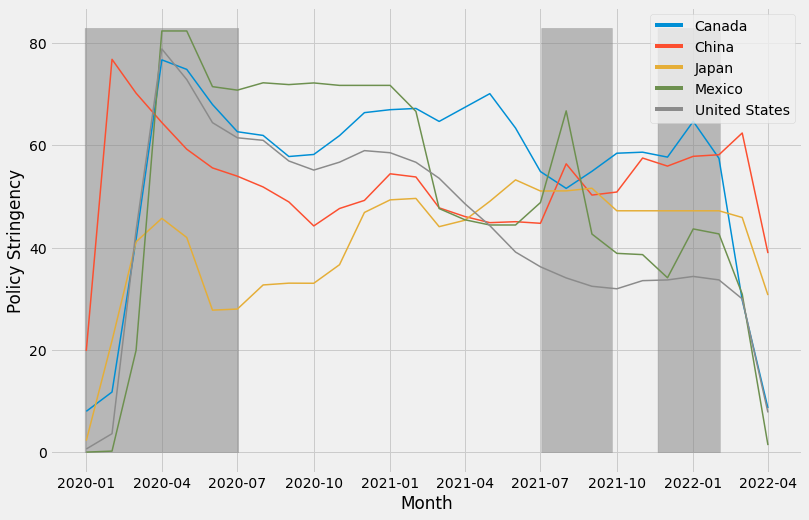

In [47]:
y = np.arange(0, 83, 0.001)
x1 = [18260]*len(y)
x2 = [18445]*len(y)

x5 = [18950]*len(y)
x6 = [19025]*len(y)

fig = plt.figure(figsize=(12, 8))
g = sns.lineplot(x=pd.to_datetime(agg_data['month']), y=agg_data['StringencyIndex'], hue=agg_data['CountryName'],
                 linewidth=1.5)
g = plt.legend(loc = 1)
g = plt.ylabel("Policy Stringency")
g = plt.xlabel("Month")
g = plt.fill_betweenx(y = y, x1=x1, x2=x2, color='grey', alpha=0.5)
g = plt.fill_betweenx(y = y, x1=x3, x2=x4, color='grey', alpha=0.5)
g = plt.fill_betweenx(y = y, x1=x5, x2=x6, color='grey', alpha=0.5)

plt.savefig("../images/policy_viz.png", dpi=300, bbox_inches="tight")

In [70]:
poli = ['C1_School closing', 'C2_Workplace closing', 'C3_Cancel public events', 
        'C4_Restrictions on gatherings', 'C5_Close public transport', 'C6_Stay at home requirements',
       'C7_Restrictions on internal movement', 'C8_International travel controls']

for pol in poli:
    agg_data[pol] = agg_data[pol].apply(lambda x: 1 if x > 0 else 0)

In [71]:
agg_data['month'] = pd.to_datetime(agg_data['month'])

In [72]:
imp_data['month'] = imp_data['Time'].apply(lambda x: str(x)[: 7])
imp_data['month'] = pd.to_datetime(imp_data['month'])

In [73]:
data_all = pd.merge(imp_data, agg_data, left_on=['Country', 'month'], right_on=['CountryName', 'month'], how='left')
data_all.fillna(0, inplace=True)
data_all.drop(columns=['Time', 'CountryName'], inplace=True)

In [74]:
data_all['log_cases'] = np.log1p(data_all['ConfirmedCases'])
data_all['log_death'] = np.log1p(data_all['ConfirmedDeaths'])

In [75]:
us_policy = agg_data[agg_data['CountryName']=='United States'].copy()
us_policy['log_cases'] = np.log1p(us_policy['ConfirmedCases'])
us_policy['log_death'] = np.log1p(us_policy['ConfirmedDeaths'])

In [76]:
data_all = pd.merge(data_all, us_policy, on=['month'], how='left', suffixes=['_org', '_dst']).fillna(0)

In [77]:
data_all.to_csv('../data/processed/import_policy.csv', index=False)